<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

Linear Regression Coefficients: [-16.2578       9.28842016]
Quadratic Regression Coefficients: [-5.93904384  8.69360943 -1.77579633]
Cubic Regression Coefficients: [-1.81475935  0.3872521  -2.11449796  0.50922389]
Linear Regression MSE: 196.648181473374
Quadratic Regression MSE: 112.07532476906128
Cubic Regression MSE: 8.07247882377026


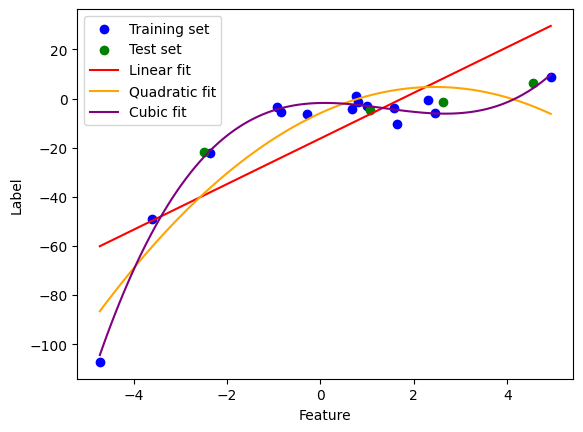

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/main/datasets/data.csv'
dataset = pd.read_csv(url)


X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values


train_size = 15
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


def linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

theta_linear = linear_regression(X_train, y_train)
print("Linear Regression Coefficients:", theta_linear)


def quadratic_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X, X**2]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

theta_quadratic = quadratic_regression(X_train, y_train)
print("Quadratic Regression Coefficients:", theta_quadratic)


def cubic_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X, X**2, X**3]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

theta_cubic = cubic_regression(X_train, y_train)
print("Cubic Regression Coefficients:", theta_cubic)


def mean_squared_error(X, y, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    if len(theta) == 3:
        X_b = np.c_[X_b, X**2]
    elif len(theta) == 4:
        X_b = np.c_[X_b, X**2, X**3]

    y_pred = X_b.dot(theta)
    mse = np.mean((y_pred - y)**2)
    return mse

mse_linear = mean_squared_error(X_test, y_test, theta_linear)
mse_quadratic = mean_squared_error(X_test, y_test, theta_quadratic)
mse_cubic = mean_squared_error(X_test, y_test, theta_cubic)

print("Linear Regression MSE:", mse_linear)
print("Quadratic Regression MSE:", mse_quadratic)
print("Cubic Regression MSE:", mse_cubic)


plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='green', label='Test set')

X_plot = np.linspace(min(X), max(X), 100)
y_linear_plot = theta_linear[0] + theta_linear[1] * X_plot
y_quadratic_plot = theta_quadratic[0] + theta_quadratic[1] * X_plot + theta_quadratic[2] * X_plot**2
y_cubic_plot = theta_cubic[0] + theta_cubic[1] * X_plot + theta_cubic[2] * X_plot**2 + theta_cubic[3] * X_plot**3

plt.plot(X_plot, y_linear_plot, color='red', label='Linear fit')
plt.plot(X_plot, y_quadratic_plot, color='orange', label='Quadratic fit')
plt.plot(X_plot, y_cubic_plot, color='purple', label='Cubic fit')

plt.xlabel('Feature')
plt.ylabel('Label')
plt.legend()
plt.show()
